In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Model which take image containing face(s) and identify the landmarks of the image**

In [0]:
#Importing the required libraries
import cv2
from google.colab.patches import cv2_imshow
from imutils import face_utils
import dlib
import cv2

In [0]:
#To read an image
image = cv2.imread('/content/drive/My Drive/images/example_01.jpg')

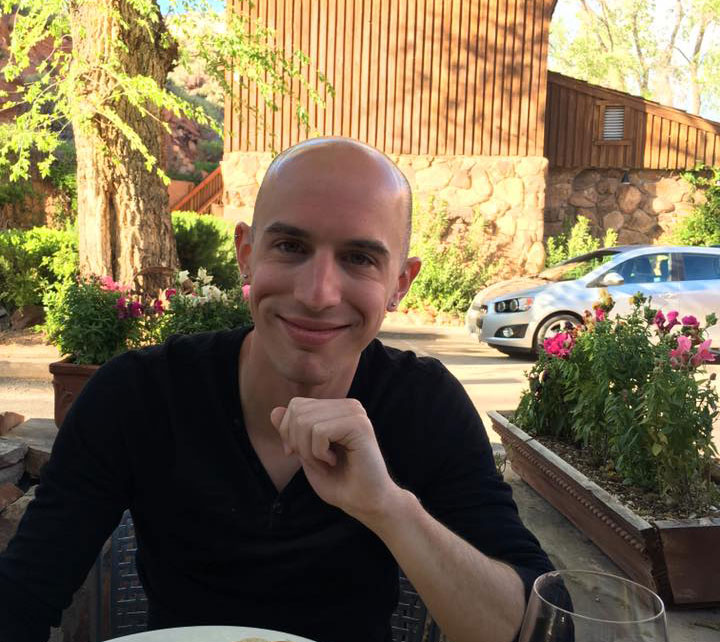

In [76]:
#To show the image
cv2_imshow(image)

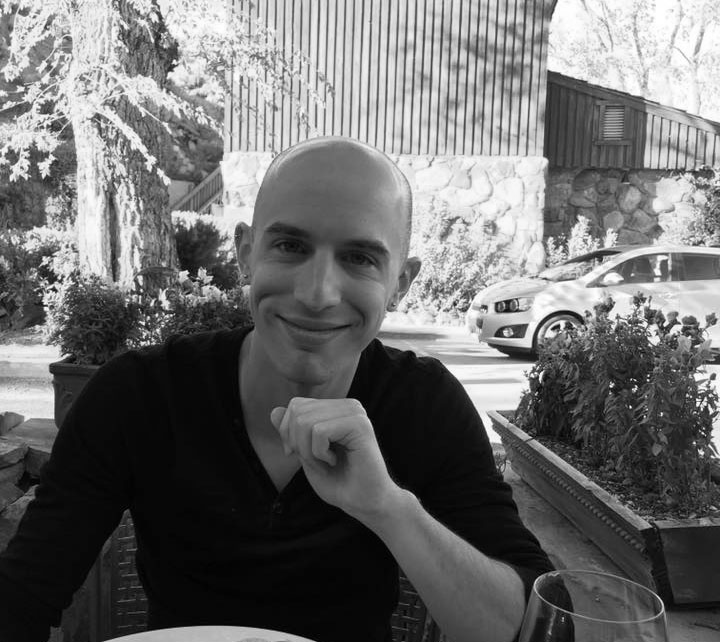

In [77]:
#To convert rgb image to grayscale image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [0]:
# To use shape_predictor_68_face_landmarks pretrained model to detect face
p = "/content/drive/My Drive/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

In [0]:
#  To get bounding ractangle of the image
rects = detector(gray, 1)

In [0]:
# To get coordinates of left top coordinates, width and height of the bouding box of face
for (i, face) in enumerate(rects):
  # Finding points for rectangle to draw on face
  x, y, w, h = face.left(), face.top(), face.width(), face.height()

In [81]:
#To make bounding box on face
image_box = cv2.imread('/content/drive/My Drive/images/example_01.jpg')
cv2.rectangle(image_box,(x,y),(x+w,y+h),(0,255,0),5)

array([[[ 78, 174, 164],
        [101, 199, 193],
        [109, 216, 213],
        ...,
        [146, 250, 243],
        [153, 255, 252],
        [144, 253, 245]],

       [[ 49, 150, 142],
        [ 86, 192, 185],
        [122, 235, 231],
        ...,
        [129, 238, 230],
        [134, 245, 237],
        [125, 236, 228]],

       [[ 37, 140, 132],
        [ 89, 198, 190],
        [125, 241, 236],
        ...,
        [126, 238, 230],
        [126, 241, 232],
        [117, 232, 223]],

       ...,

       [[ 21,  16,  13],
        [ 21,  16,  13],
        [ 20,  15,  12],
        ...,
        [ 88,  90,  91],
        [ 86,  88,  89],
        [ 84,  86,  87]],

       [[ 23,  18,  15],
        [ 20,  15,  12],
        [ 20,  15,  12],
        ...,
        [ 84,  89,  92],
        [ 83,  88,  91],
        [ 82,  87,  90]],

       [[ 18,  13,  10],
        [ 16,  11,   8],
        [ 16,  11,   8],
        ...,
        [ 90,  95,  98],
        [ 90,  95,  98],
        [ 89,  94,  97]]

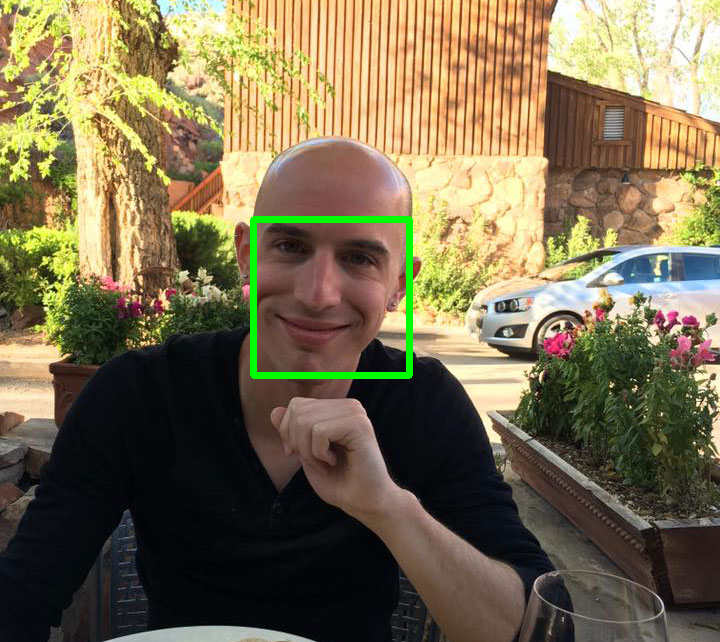

In [82]:
# To show boundix box on face 
cv2_imshow(image_box)

In [0]:
# To make very small circle on the landmarks of the face
for (i, rect) in enumerate(rects):
        # Make the prediction and transfom it to numpy array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
    
        # Draw on our image, all the finded cordinate points (x,y) 
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

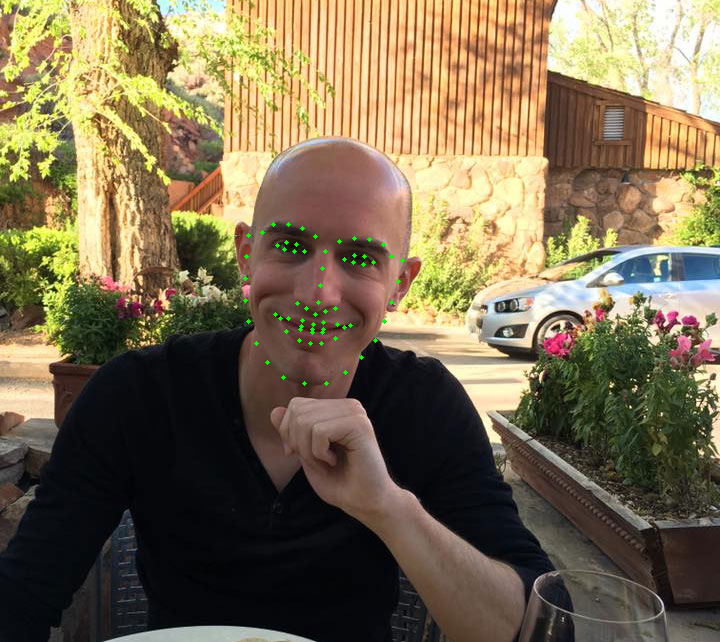

In [84]:
# To show the landmark of the face
cv2_imshow(image)

**Dlib is a landmark’s facial detector with pre-trained models, the dlib is used to estimate the location of 68 coordinates (x, y) that map the facial points on a person’s face like image be**low.

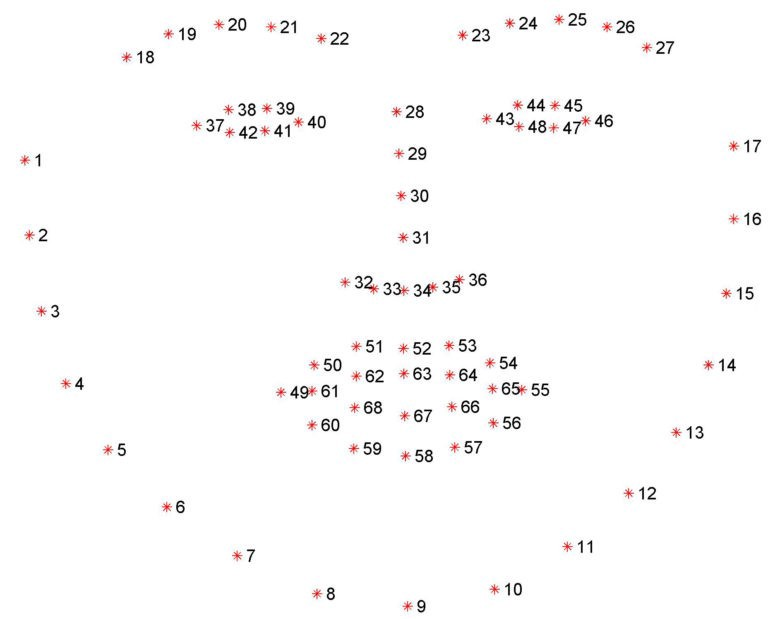

In [92]:
# To show the location of 68 coordinates on face 
dlib_points = cv2.imread('/content/drive/My Drive/dlib_face_landmark_points.jpg')
cv2_imshow(dlib_points)

From above figure we can conclude:
 Points from 4 and 14 of 68 coordinetes can be used to draw jawline and if we will join these points it will draw jawline of the face.

In [86]:
#To find coordinates of all landmarks
import numpy as np
for k, d in enumerate(rects):
    shape = predictor(img, d)

vec = np.empty([68, 2], dtype = int)
for b in range(68):
    vec[b][0] = shape.part(b).x
    vec[b][1] = shape.part(b).y

print(vec)

[[248 232]
 [246 254]
 [246 276]
 [245 298]
 [248 319]
 [256 341]
 [267 361]
 [283 377]
 [304 384]
 [327 383]
 [347 372]
 [362 356]
 [376 339]
 [385 321]
 [392 302]
 [399 281]
 [403 260]
 [262 232]
 [273 224]
 [288 224]
 [302 228]
 [315 236]
 [339 241]
 [353 238]
 [369 239]
 [383 244]
 [391 256]
 [325 251]
 [322 268]
 [320 285]
 [317 302]
 [297 303]
 [306 308]
 [315 314]
 [325 311]
 [334 308]
 [277 245]
 [286 242]
 [296 243]
 [305 251]
 [294 251]
 [285 249]
 [343 259]
 [354 254]
 [364 256]
 [373 262]
 [363 263]
 [353 262]
 [275 314]
 [289 318]
 [302 320]
 [313 324]
 [323 322]
 [337 324]
 [351 325]
 [336 338]
 [321 344]
 [310 344]
 [299 340]
 [286 331]
 [280 317]
 [301 327]
 [312 330]
 [323 329]
 [345 327]
 [322 332]
 [312 332]
 [301 329]]


In [96]:
#To make a numpy array of 4 to 14 of 68 coordinates
l=[]
for i in range(4,14):
  print(vec[i])
  l.append(vec[i])

[248 319]
[256 341]
[267 361]
[283 377]
[304 384]
[327 383]
[347 372]
[362 356]
[376 339]
[385 321]


In [98]:
#To see points between 4 to 14 coordinates
pts =np.asarray(l)
print(pts)

[[248 319]
 [256 341]
 [267 361]
 [283 377]
 [304 384]
 [327 383]
 [347 372]
 [362 356]
 [376 339]
 [385 321]]


In [109]:
#To draw jawlines on the face
image = cv2.imread('/content/drive/My Drive/images/example_01.jpg')
cv2.polylines(image,[pts],False,(0,255,255),3)

array([[[ 78, 174, 164],
        [101, 199, 193],
        [109, 216, 213],
        ...,
        [146, 250, 243],
        [153, 255, 252],
        [144, 253, 245]],

       [[ 49, 150, 142],
        [ 86, 192, 185],
        [122, 235, 231],
        ...,
        [129, 238, 230],
        [134, 245, 237],
        [125, 236, 228]],

       [[ 37, 140, 132],
        [ 89, 198, 190],
        [125, 241, 236],
        ...,
        [126, 238, 230],
        [126, 241, 232],
        [117, 232, 223]],

       ...,

       [[ 21,  16,  13],
        [ 21,  16,  13],
        [ 20,  15,  12],
        ...,
        [ 88,  90,  91],
        [ 86,  88,  89],
        [ 84,  86,  87]],

       [[ 23,  18,  15],
        [ 20,  15,  12],
        [ 20,  15,  12],
        ...,
        [ 84,  89,  92],
        [ 83,  88,  91],
        [ 82,  87,  90]],

       [[ 18,  13,  10],
        [ 16,  11,   8],
        [ 16,  11,   8],
        ...,
        [ 90,  95,  98],
        [ 90,  95,  98],
        [ 89,  94,  97]]

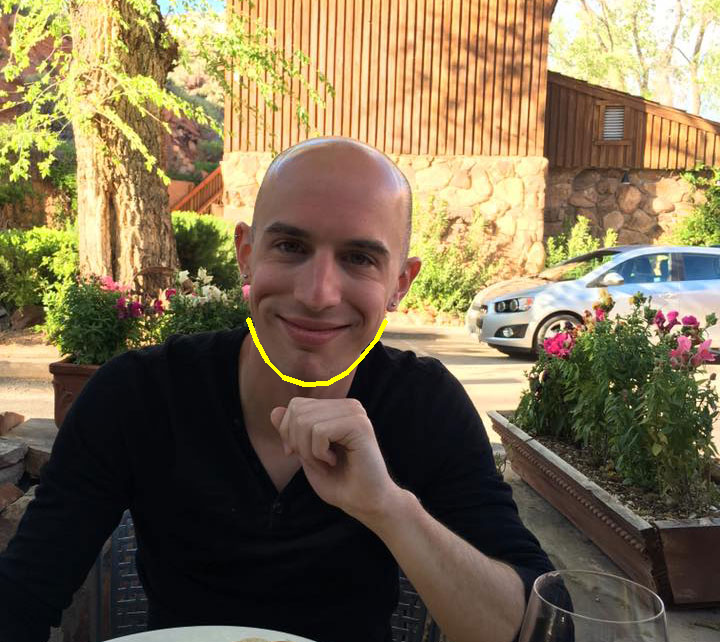

In [110]:
#To show jawline on the face
cv2_imshow(image)

In [0]:
# To draw jawline and landmarks on the image
image3 = cv2.imread('/content/drive/My Drive/images/example_01.jpg')
cv2.polylines(image3,[pts],False,(255,0,0),3)
for (i, rect) in enumerate(rects):
        # Make the prediction and transfom it to numpy array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
    
        # Draw on our image, all the finded cordinate points (x,y) 
        for (x, y) in shape:
            cv2.circle(image3, (x, y), 2, (0, 255, 0), -1)


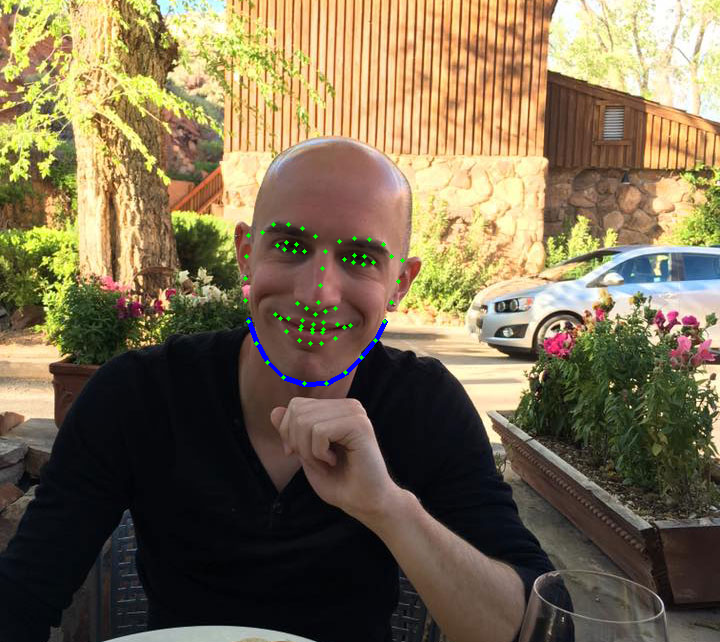

In [114]:
# To show jawline and landmarks of the image
cv2_imshow(image3)

**Detection of ladmarks for multiple faces in an image**

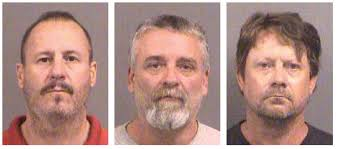

In [14]:
image = cv2.imread('/content/drive/My Drive/img.jpg')
cv2_imshow(image)

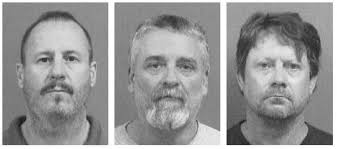

In [15]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

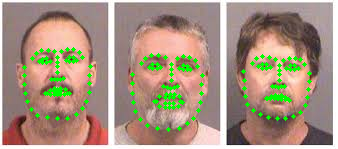

In [20]:
for (i, rect) in enumerate(rects):
        # Make the prediction and transfom it to numpy array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
    
        # Draw on our image, all the finded cordinate points (x,y) 
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
cv2_imshow(image)

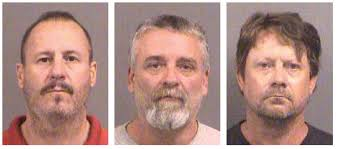

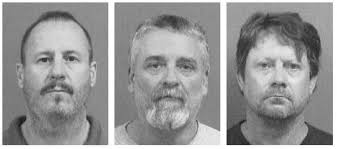

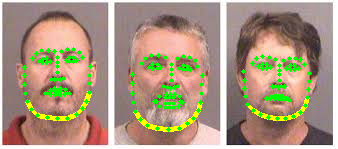

In [28]:
import numpy as np
image = cv2.imread('/content/drive/My Drive/img.jpg')
cv2_imshow(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
for (i, rect) in enumerate(rects):
        # Make the prediction and transfom it to numpy array
        shape = predictor(gray, rect)

        vec = np.empty([68, 2], dtype = int)
        for b in range(68):
          vec[b][0] = shape.part(b).x
          vec[b][1] = shape.part(b).y
        l=[]
        for i in range(4,14):
          l.append(vec[i])
        pts =np.asarray(l)

        cv2.polylines(image,[pts],False,(0,255,255),3)
        shape = face_utils.shape_to_np(shape)
        # Draw on our image, all the finded cordinate points (x,y) 
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
cv2_imshow(image)

**We gave detected the landmarks of the face and the drwan the jawline of the face in an image**